# Criar Analise de dados sobre saúde fetal:
<br>   
<p> Análise de dados do exame Cardiotocogramas (CTGs)
que tem por objetivo medir a frequência cardíaca fetal (FCF), movimentos fetais,
contrações uterinas e muito mais fetal para prevenir a mortalidade infantil e materna. O
conjunto de dados contém 2.126 registros, que foram classificados por três obstetricistas
especialistas em 3 classes: Normal, Suspeito e Patológico. Sendo assim, o objetivo é
      criar um modelo multiclasse que classifique os dados nestes três estados de saúde fetal. </p>

In [40]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [102]:
# ler arquivos de dados
df = pd.read_csv('fetal_health.csv')

In [3]:
df.head()

,baseline value,accelerations,fetal_movement,uterine_contractions,light_decelerations,severe_decelerations,prolongued_decelerations,abnormal_short_term_variability,mean_value_of_short_term_variability,percentage_of_time_with_abnormal_long_term_variability,...,histogram_min,histogram_max,histogram_number_of_peaks,histogram_number_of_zeroes,histogram_mode,histogram_mean,histogram_median,histogram_variance,histogram_tendency,fetal_health
0,120.0,0.000,0.0,0.000,0.000,0.0,0.0,73.0,0.5,43.0,...,62.0,126.0,2.0,0.0,120.0,137.0,121.0,73.0,1.0,2.0
1,132.0,0.006,0.0,0.006,0.003,0.0,0.0,17.0,2.1,0.0,...,68.0,198.0,6.0,1.0,141.0,136.0,140.0,12.0,0.0,1.0
2,133.0,0.003,0.0,0.008,0.003,0.0,0.0,16.0,2.1,0.0,...,68.0,198.0,5.0,1.0,141.0,135.0,138.0,13.0,0.0,1.0
3,134.0,0.003,0.0,0.008,0.003,0.0,0.0,16.0,2.4,0.0,...,53.0,170.0,11.0,0.0,137.0,134.0,137.0,13.0,1.0,1.0
4,132.0,0.007,0.0,0.008,0.000,0.0,0.0,16.0,2.4,0.0,...,53.0,170.0,9.0,0.0,137.0,136.0,138.0,11.0,1.0,1.0


## Verificando dados faltantes:

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2126 entries, 0 to 2125
Data columns (total 22 columns):
 #   Column                                                  Non-Null Count  Dtype  
---  ------                                                  --------------  -----  
 0   baseline value                                          2126 non-null   float64
 1   accelerations                                           2126 non-null   float64
 2   fetal_movement                                          2126 non-null   float64
 3   uterine_contractions                                    2126 non-null   float64
 4   light_decelerations                                     2126 non-null   float64
 5   severe_decelerations                                    2126 non-null   float64
 6   prolongued_decelerations                                2126 non-null   float64
 7   abnormal_short_term_variability                         2126 non-null   float64
 8   mean_value_of_short_term_variability  

In [5]:
df['fetal_health'].mean()

1.304327375352775

## Criar modelo de machine learning a partir do dados coletados:

<p>Criar modelo de Machine Learning do Dataframe verificando a previsão da saúde fetal, sendo 1.0: normal, 2.0:suspeito,   3.0:patologico </p>

In [70]:
# importando biclioteca sklearn e utilizando naive bayes para realizar o modelo.
import sklearn
from sklearn import svm
from sklearn.naive_bayes import GaussianNB
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import classification_report


## Definindo variavel alvo e variaveis preditoras:

In [71]:
# variavel alvo
y = df['fetal_health']

#variaveis preditoras, axis=1 relacionando a exclusão da coluna fetal_health
X = df.drop(['fetal_health'],axis=1)


## Modelo de Classificação Naive Bayes:

<p>   Será utilizado o algoritmo de classificação Naive Bayes, pois é um algoritmo que se comporta bem diante de predições de saúde, diante disso o modelo foi dividido em 30% de teste e 70% de treino. </p>

In [72]:
# definindo algoritmo 
modelo = GaussianNB()
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)


In [73]:
predicao = modelo.fit(X_train, y_train).predict(X_test)
resultado = modelo.score(X_test,y_test)

In [74]:
print("Acurácia ",resultado)

Acurácia  0.8025078369905956


## Utilizando Validação Cruzada com 5 folds:

<p>   utilizando processo de validação cruzada, no qual é utilizado para verificar a capacidade de generalização do modelo.</p>


In [75]:
#utilizando validação cruzada
validacao_cruz = cross_val_score(modelo,X_train,y_train, cv=5,scoring="accuracy")

In [76]:
validacao_cruz

array([0.8557047 , 0.7852349 , 0.80536913, 0.81481481, 0.80808081])

In [77]:
# media da validação cruzada e verificação da acuracia
validacao_cruz.mean()

0.8138408695455676

In [79]:
df['fetal_health'].value_counts()

1.0    1655
2.0     295
3.0     176
Name: fetal_health, dtype: int64

## Utilizando Matriz de Confusão:

<p>   Utiliza-se matriz de confusão para verificar os resultados como verdadeiro positivo e falso negativo. </p>

In [85]:
# verificando matriz de confusão
confusion_matrix(y_test, predicao)


array([[404,  74,  16],
       [ 13,  69,   4],
       [  2,  17,  39]], dtype=int64)

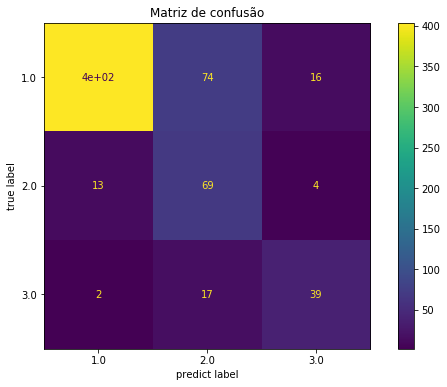

In [98]:
matrix = plot_confusion_matrix(modelo,X_test, y_test)
matrix.ax_.set_title("Matriz de confusão",color="black")
plt.xlabel("predict label",color="black")
plt.ylabel("true label",color="black")
plt.gcf().axes[0].tick_params(colors="black")
plt.gcf().axes[1].tick_params(colors="black")
plt.gcf().set_size_inches(10,6)
plt.show()

## Análise de classificação:

<p>   Utiliza-se para verificar </p> 
    <ul>
        <li>precisão dos dados: verifica a porcentagem de positivos</li>
        <li>recall dos dados: verifica todas as instâncias que foram realmente positivas</li>
        <li>f1-score: media entre a precisão e o recall, f1 varia entra 0.0 e 1.0 </li>
        <li>support: quantidade de dados que foram analisados</li>
    </ul>
</p>

In [80]:
print(classification_report(y_test,predicao))

              precision    recall  f1-score   support

         1.0       0.96      0.82      0.88       494
         2.0       0.43      0.80      0.56        86
         3.0       0.66      0.67      0.67        58

    accuracy                           0.80       638
   macro avg       0.69      0.76      0.70       638
weighted avg       0.86      0.80      0.82       638

